# Assignment 3: ICP + Non-linear least squares optimization

TEAM-NAME: BayesianMechanics

YOUR-ID: 2018113001, 2018113002

YOUR-NAME: Animesh Sinha, Bhuvanesh Sridharan

## Instructions

* You are not allowed to use any external libraries (other than ones being imported below).
* The deadline for this assignment is **15-09-21** at 11:55pm.
* Plagiarism is **strictly prohibited**

In [1]:
import copy
import math
import time

import open3d as o3d
import numpy as np
from matplotlib import pyplot as plt
import tqdm.notebook as tqdm

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


# Non Linear Least Squares Optimization

## 1.1 Gradient Descent
Implement the gradient descent algorithm using numpy and what you have learned from class to solve for the parameters of a gaussian distribution.
To understand the task in more detail and look at a worked through example, checkout the subsequent section. You have to implement the same using just numpy functions. You can refer to [Shubodh's notes](https://www.notion.so/saishubodh/From-linear-algebra-to-non-linear-weighted-least-squares-optimization-13cf17d318be4d45bb8577c4d3ea4a02) on the same to get a better grasp of the concept before implementing it.
* Experiment with the number of iterations.
* Experiment with the learning rate.
* Experiment with the tolerance.

Display your results using matplotlib by plotting graphs for 
* The cost function value vs the number of iterations
* The Ground Truth data values and the predicted data values.

Your plots are expected to contain information similar to the plot below:

<!-- <figure> -->
<img src='./helpers/sample_plt.png' alt=drawing width=500 height=600>

<!-- <figcaption align='center'><b>A sample plot, you can use your own plotting template</b></figcaption>
</figure> -->
<!-- head over to [this page](https://saishubodh.notion.site/Non-Linear-Least-Squares-Solved-example-Computing-Jacobian-for-a-Gaussian-Gradient-Descent-7fd11ebfee034f8ca89cc78c8f1d24d9) -->

## Worked out Example using Gradient Descent

A Gaussian distribution parametrized by $a,m,s$ is given by:

$$ y(x;a,m,s)=a \exp \left(\frac{-(x-m)^{2}}{2 s^{2}}\right) \tag{1}$$

### Jacobian of Gaussian

$$\mathbf{J}_y=\left[\frac{\partial y}{\partial a} \quad \frac{\partial y}{\partial m} \quad \frac{\partial y}{\partial s}\right] \\
= \left[ \exp \left(\frac{-(x-m)^{2}}{2 s^{2}}\right); \frac{a (x-m)}{s^2} \exp\left(\frac{-(x-m)^{2}}{2 s^{2}}\right);  \frac{a (x-m)^2}{s^3}\exp \left(\frac{-(x-m)^{2}}{2 s^{2}}\right)\right]$$

## Problem at hand

> Given a set of observations $y_{obs}$ and $x_{obs}$ we want to find the optimum parameters $a,m,s$ which best fit our observations given an initial estimate.

Our observations would generally be erroneous and given to us, but for the sake of knowing how good our model is performing, let us generate the observations ourselves by assuming the actual "actual" parameter values as $a_{gt}=10; m_{gt} =0; s_{gt} =20$ ($gt$ stands for ground truth). We will try to estimate these values based on our observations and let us see how close we get to "actual" parameters. Note that in reality we obviously don't have these parameters as that is exactly what we want to estimate in the first place. So let us consider the following setup, we have:

- Number of observations, $num\_obs = 50$
- Our 50 set of observations would be
    - $x_{obs} = np.linspace(-25,25, num\_obs)$
    - $y_{obs} = y(x_{obs};a_{gt},m_{gt},s_{gt})$  from $(1)$

Reference:

→[linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)

- Say we are given initial estimate as:

    $$a_0=10; \quad m_0=13; \quad s_0=19.12$$

### Residual and error to be minimized

Okay, now we have set of observations and an initial estimate of parameters. We would now want to minimize an error that would give us optimum parameters.

The $residual$ would be given by

$$ r(a,m,s) = \left[ a \exp \left(\frac{-(x_{obs}-m)^{2}}{2 s^{2}}\right) - y_{obs}\ \right]$$

where we'd want to minimize $\|r\|^2$. Note that $r$ is a non-linear function in $(a,m,s)$.

Also, note that since $y$ (and $x$) are observations in the above equation, after simplification, we get $\mathbf{J}_r = \mathbf{J}_y$ [above](https://www.notion.so/c9e6f71b67a44bb8b366df2fccfc12d0) (since $y_{obs}$ is a constant).

Let us apply Gradient Descent method for minimization here. From [Table I](https://www.notion.so/From-linear-algebra-to-non-linear-weighted-least-squares-optimization-13cf17d318be4d45bb8577c4d3ea4a02),  

$$\Delta \mathbf{k} = - \alpha \mathbf{J_F} = -\alpha \mathbf{J}_r^{\top} {r}(\mathbf{k})$$

Note that $\mathbf{J_F}$ is the Jacobian of "non-linear least squares" function $\mathbf{F}$ while $\mathbf{J}_r$ is the Jacobian of the residual. 

where $\mathbf{k}$ is $[a,m,s]^T$. 

- Some hyperparameters:
    - Learning rate, $lr = 0.01$
    - Maximum number of iterations, $num\_iter=200$
    - Tolerance, $tol = 1e-15$

## Solution for 1 iteration

To see how each step looks like, let us solve for 1 iteration and for simpler calculations, assume we have 3 observations, 

$$x_{obs}= \left[ -25, 0, 25 \right]^T, y_{obs} = \left[  4.5783, 10, 4.5783 \right]^T. $$

With our initial estimate as $\mathbf{k_0} = [a_0=10, \quad m_0=13, \quad s_0=19.12]^T$, the residual would be 

$$ r(a_0,m_0,s_0) = \left[ a_0 \exp \left(\frac{-(x_{obs}-m_0)^{2}}{2 s_0^{2}}\right) - y_{obs}\ \right]$$

Therefore, $r=[-3.19068466, -2.0637411 , 3.63398058]^T$.

### Gradient Computation

Gradient, $\mathbf{J_F}$=

$$\mathbf{J_r}^{\top} \mathbf{r}(\mathbf{k})$$

We have calculated residual already [above](https://www.notion.so/c9e6f71b67a44bb8b366df2fccfc12d0), let us calculate the Jacobian $\mathbf{J_r}$.

$$\mathbf{J}_r
= \left[ \exp \left(\frac{-(x-m)^{2}}{2 s^{2}}\right); \frac{a (x-m)}{s^2} \exp\left(\frac{-(x-m)^{2}}{2 s^{2}}\right);  \frac{a (x-m)^2}{s^3}\exp \left(\frac{-(x-m)^{2}}{2 s^{2}}\right)\right]$$

$$\implies \mathbf{J_r} = \left[ \begin{array}{rrr}0.1387649 & 0.79362589, & 0.82123142 \\-0.14424057 & -0.28221715  & 0.26956967 \\0.28667059 & 0.19188405, & 0.16918599\end{array}\right]$$

So ,

$$\mathbf{J_F} = \mathbf{J_r}^{\top} \mathbf{r}(\mathbf{k})$$

$$\mathbf{r}(\mathbf{k}) =  \left[ \begin{array}{r}-3.19068466 \\ -2.0637411 \\ 3.63398058 \end{array} \right]$$

$$ \begin{aligned} \implies \mathbf{J_F} = \left[ \begin{array}{r} 0.89667553 \\ -1.25248392 \\-2.56179392\end{array} \right] \end{aligned}$$

### Update step

$$
\Delta \mathbf{k} = - \alpha \mathbf{J_F} \\
\mathbf{k}^{t+1} = \mathbf{k}^t + \Delta \mathbf{k}
$$

Here, $\alpha$ our learning rate is 0.01.

$$
\Delta \mathbf{k} = - \alpha\times\left[ \begin{array}{r} 
0.89667553 \\ -1.25248392 \\-2.56179392
\end{array} \right] = \left[ \begin{array}{r}
-0.00896676 \\ 0.01252484 \\0.02561794
\end{array}\right]
$$

$$
\mathbf{k}^{1} = \mathbf{k}^{0} + \Delta \mathbf{k} \\ \left[\begin{array}{r} 10 \\ 13 \\ 19.12 \end{array}\right] + \left[\begin{array}{c} 9.99103324 \\ 13.01252484 \\ 19.14561794 \end{array} \right]
$$

With just one iteration with very few observations, we can see that we have gotten *slightly* more closer to our GT parameter  $a_{gt}=10; m_{gt} =0; s_{gt} =20$. Our initial estimate was $[a_0=10, \quad m_0=13, \quad s_0=19.12]$. However, the above might not be noticeable enough: Hence you need to code it for more iterations and convince yourself as follows:

### Gradient Descent on Gaussian

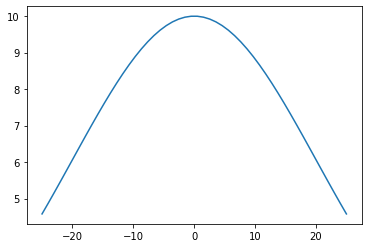

In [2]:
def fn(x, a, m, s):
    return a * np.exp(-(x - m) ** 2 / (2 * s * s))

a_gt, m_gt, s_gt = 10, 0, 20
x_obs = np.linspace(-25, 25, 50)
y_obs = fn(x_obs, a_gt, m_gt, s_gt)

plt.plot(x_obs, y_obs)
plt.show()

In [3]:
def optimize(x, y, lr = 0.01, iters=1000):
    loss = []
    k = np.array([[10, 13, 19.12]]).T
    with tqdm.trange(iters) as iterator:
        for i in iterator:
            a, m, s = k[0, 0], k[1, 0], k[2, 0]
            r = np.expand_dims(fn(x, a, m, s) - y, axis=1)
            loss.append(np.sum(r ** 2))
            j_r = np.vstack([                                np.exp(-(x - m) ** 2 / (2 * s * s)),
                             (a * (x - m)     ) / (s ** 2) * np.exp(-(x - m) ** 2 / (2 * s * s)),
                             (a * (x - m) ** 2) / (s ** 3) * np.exp(-(x - m) ** 2 / (2 * s * s)),])
            j_f = j_r @ r
            k = k - lr * j_f
            iterator.set_postfix(loss=loss[-1])
    return {'training_loss': loss, 'result': k}
    
history = optimize(x_obs, y_obs)

  0%|          | 0/1000 [00:00<?, ?it/s]

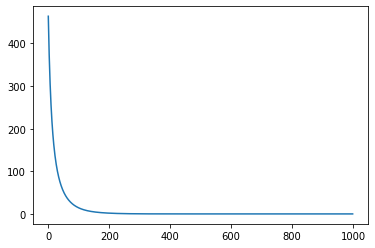

In [4]:
plt.plot(history['training_loss'])

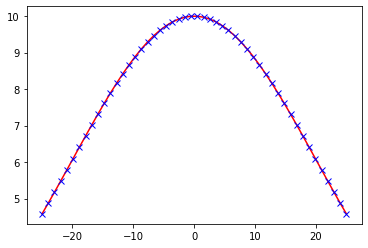

In [5]:
x_obs = np.linspace(-25, 25, 50)
y_obs = fn(x_obs, a_gt, m_gt, s_gt)
k = history['result']
y_pred = fn(x_obs, k[0, 0], k[1, 0], k[2, 0])

plt.plot(x_obs, y_obs, 'r')
plt.plot(x_obs, y_pred, 'bx')
plt.show()

## 1.2: Another Non-Linear function
Now that you've got the hang of computing the jacobian matrix for a non-linear function via the aid of an example, try to compute the jacobian of a secondary gaussian function by carrying out steps similar to what has been shown above. The function is plotted below:
<img src='./helpers/non_linear.png' alt=drawing width=500 height=600>
Using the computed jacobian, optimise for the four parameters using gradient descent, where the parameters to be estimated are: 

$p_1$ = 2,  $p_2$ = 8,  $p_3$ = 4,  $p_4$ = 8. 

Do this for $x_{obs} = np.linspace(-20, 30, num\_obs)$,
where $num\_obs$ is 50.

### Gradient Descent on Non-Linear function

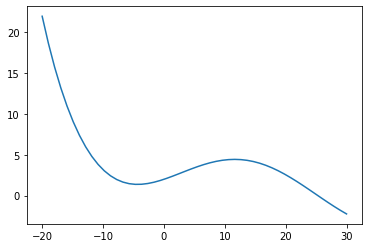

In [27]:
def fn(x, p):
    return p[0] * np.exp(- x / p[1]) + p[2] * np.sin(x / p[3])

p_gt = np.array([2, 8, 4, 8])
x_obs = np.linspace(-20, 30, 50)
y_obs = fn(x_obs, p_gt)

plt.plot(x_obs, y_obs)
plt.show()

In [7]:
def optimize(x, y, lr = 0.01, iters=1000):
    loss = []
    k = np.array([[2, 10, 3, 12]]).T
    with tqdm.trange(iters) as iterator:
        for i in iterator:
            r = np.expand_dims(fn(x, np.squeeze(k)) - y, axis=1)
            loss.append(np.sum(r ** 2))
            j_r = np.vstack([np.exp(-x / k[1, 0]),
                             k[0, 0] * np.exp(- x / k[1, 0]) * (x / (k[1, 0] ** 2)),
                             np.sin(x / k[3, 0]),
                             k[2, 0] * np.cos(x / k[3, 0]) * (-x / (k[3, 0] ** 2))])
            j_f = j_r @ r
            k = k - lr * j_f
            iterator.set_postfix(loss=loss[-1])
    return {'training_loss': loss, 'result': k}
    
history = optimize(x_obs, y_obs)

  0%|          | 0/1000 [00:00<?, ?it/s]

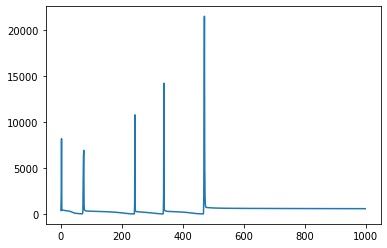

In [8]:
plt.plot(history['training_loss'])

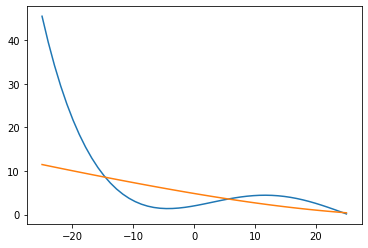

In [9]:
x_obs = np.linspace(-25, 25, 50)
y_obs = fn(x_obs, p_gt)
k = history['result']
y_pred = fn(x_obs, np.squeeze(k))

plt.plot(x_obs, y_obs)
plt.plot(x_obs, y_pred)
plt.show()

## 1.3: Different Optimizers

Replace gradient descent with Gauss-Newton and Levenberg Marquardt algorithms and repeat question 1.1. 

To quickly recap, Gauss-Newton and Levenberg Marquardt are alternate update rules to the standard gradient descent. Gauss Newton updates work as:

$$\delta x = -(J^TJ)^{-1}J^Tf(x)$$

Levenberg Marquardt lies somewhere between Gauss Newton and Gradient Descent algorithms by blending the two formulations. As a result, when at a steep cliff, LM takes small steps to avoid overshooting, and when at a gentle slope, LM takes bigger steps:


$$\delta x = -(J^TJ + \lambda I)^{-1}J^Tf(x)$$

**Questions**
   * 1. How does the choice of initial estimate and learning rate affect convergence? Observations and analysis from repeated runs with modified hyperparameters will suffice.
   * 2. Do you notice any difference between the three optimizers? Why do you think that is? (If you are unable to see a clear trend, what would you expect in general based on what you know about them)

### Answer 1

The estimate seems to help the convergence a lot, a bad starting estimate will lead to convergence to a local minima. The effect of starting point if there is correct convergence in the end seems to be not a lot, there is a general linear speedup given low learning rates, but no superlinear effects are seen over multiple runs.

### Answer 2

The first order optimizer, which is Gradient descent performs on average worse, i.e. converges slower, than the second order methods like Gauss Newton. This is because in the same number of steps, more computation is being done, so these methods also take longer. Therefore in the same amount of compute time, gradient descent might be better performing.

### Gauss Newtom

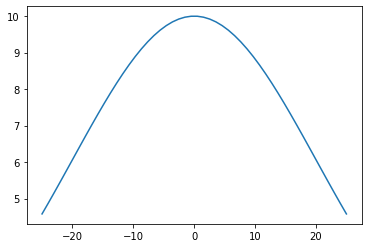

In [10]:
def fn(x, a, m, s):
    return a * np.exp(-(x - m) ** 2 / (2 * s * s))

a_gt, m_gt, s_gt = 10, 0, 20
x_obs = np.linspace(-25, 25, 50)
y_obs = fn(x_obs, a_gt, m_gt, s_gt)

plt.plot(x_obs, y_obs)
plt.show()

In [11]:
def optimize(x, y, iters=100):
    loss = []
    k = np.array([[10, 13, 19.12]]).T
    with tqdm.trange(iters) as iterator:
        for i in iterator:
            a, m, s = k[0, 0], k[1, 0], k[2, 0]
            r = np.expand_dims(fn(x, a, m, s) - y, axis=1)
            loss.append(np.sum(r ** 2))
            j = np.vstack([                                np.exp(-(x - m) ** 2 / (2 * s * s)),
                           (a * (x - m)     ) / (s ** 2) * np.exp(-(x - m) ** 2 / (2 * s * s)),
                           (a * (x - m) ** 2) / (s ** 3) * np.exp(-(x - m) ** 2 / (2 * s * s)),]).T
            k = k - (np.linalg.inv(j.T @ j) @ j.T) @ r
            iterator.set_postfix(loss=loss[-1])
    return {'training_loss': loss, 'result': k}
    
history = optimize(x_obs, y_obs)

  0%|          | 0/100 [00:00<?, ?it/s]

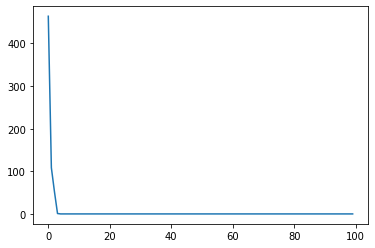

In [12]:
plt.plot(history['training_loss'])

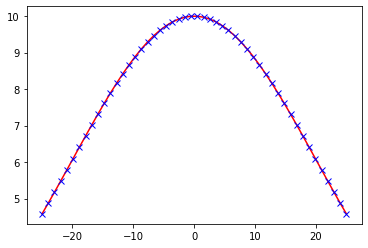

In [13]:
x_obs = np.linspace(-25, 25, 50)
y_obs = fn(x_obs, a_gt, m_gt, s_gt)
k = history['result']
y_pred = fn(x_obs, k[0, 0], k[1, 0], k[2, 0])

plt.plot(x_obs, y_obs, 'r')
plt.plot(x_obs, y_pred, 'bx')
plt.show()

### Levenberg Marquardt

In [14]:
def optimize(x, y, lr = 0.01, iters=100):
    loss = []
    k = np.array([[10, 13, 19.12]]).T
    with tqdm.trange(iters) as iterator:
        for i in iterator:
            a, m, s = k[0, 0], k[1, 0], k[2, 0]
            r = np.expand_dims(fn(x, a, m, s) - y, axis=1)
            loss.append(np.sum(r ** 2))
            j = np.vstack([                                np.exp(-(x - m) ** 2 / (2 * s * s)),
                           (a * (x - m)     ) / (s ** 2) * np.exp(-(x - m) ** 2 / (2 * s * s)),
                           (a * (x - m) ** 2) / (s ** 3) * np.exp(-(x - m) ** 2 / (2 * s * s)),]).T
            k = k - (np.linalg.inv(j.T @ j + lr * np.eye(j.shape[1])) @ j.T) @ r
            iterator.set_postfix(loss=loss[-1])
    return {'training_loss': loss, 'result': k}
    
history = optimize(x_obs, y_obs)

  0%|          | 0/100 [00:00<?, ?it/s]

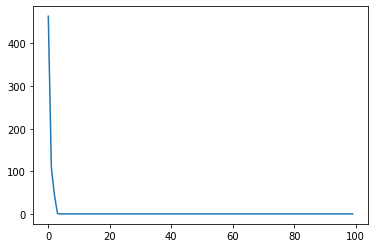

In [15]:
plt.plot(history['training_loss'])

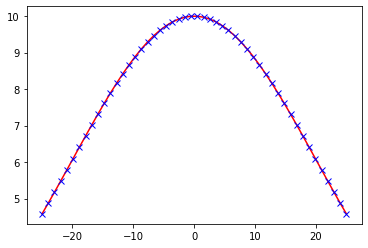

In [16]:
x_obs = np.linspace(-25, 25, 50)
y_obs = fn(x_obs, a_gt, m_gt, s_gt)
k = history['result']
y_pred = fn(x_obs, k[0, 0], k[1, 0], k[2, 0])

plt.plot(x_obs, y_obs, 'r')
plt.plot(x_obs, y_pred, 'bx')
plt.show()

# 2. Iterative Closest Point

In this subsection, we will code the Iterative Closest Point algorithm to find the alignment between two point clouds without known correspondences. The point cloud that you will be using is the same as the one that you used in Assignment 1.

## 2.1: Procrustes alignment

1. Write a function that takes two point clouds as input wherein the corresponding points between the two point clouds are located at the same index and returns the transformation matrix between them.
2. Use the bunny point cloud and perform the procrustes alignment between the two bunnies. Compute the absolute alignment error after aligning the two bunnies.
3. Make sure your code is modular as we will use this function in the next sub-part.
4. Prove mathematically why the Procrustes alignment gives the best aligning transform between point clouds with known correspondences.


In [17]:
def make_transform_matrix(theta, delta):
    net_rotation = np.eye(3)
    for i in range(3):
        rot = np.array([
            [np.cos(theta[i]), -np.sin(theta[i])],
            [np.sin(theta[i]), np.cos(theta[i])],
        ])
        cur_rotation = np.eye(3)
        for x in range(3):
            for y in range(3):
                cur_rotation[x, y] = rot[x - (1 if x >= i else 0), y - (1 if y >= i else 0)] \
                    if x != i and y != i else x == y
        net_rotation = cur_rotation @ net_rotation
    
    net_transform = np.hstack([net_rotation, np.array(delta)[:, np.newaxis]])
    net_transform = np.vstack([net_transform, np.array([0, 0, 0, 1])])
    return net_transform

transform = make_transform_matrix([np.pi/2, 0, np.pi/4], [2, 3, 8])
np.round(transform, decimals=3)

array([[ 0.707, -0.   ,  0.707,  2.   ],
       [ 0.707,  0.   , -0.707,  3.   ],
       [ 0.   ,  1.   ,  0.   ,  8.   ],
       [ 0.   ,  0.   ,  0.   ,  1.   ]])

### Answer 1

In [29]:
def procrustes(pc_target, pc_observed):
    center_pc_target = np.mean(pc_target, axis=1, keepdims=True)
    center_pc_observed = np.mean(pc_observed, axis=1, keepdims=True)
    
    centered_pc_target = pc_target - center_pc_target
    centered_pc_observed = pc_observed - center_pc_observed

    H = centered_pc_target @ centered_pc_observed.T
    U, S, Vt = np.linalg.svd(H)
    R = U @ Vt
    t = center_pc_target - R @ center_pc_observed

    assert np.isclose(np.abs(np.linalg.det(R)), 1), "Rotation matrix should be unitary"
    if np.linalg.det(R) < 0:
        C = np.eye(3)
        C[2, 2] = -1
        R = U @ C @ Vt

    return np.vstack([np.hstack([R, t]), np.array([0, 0, 0, 1])])

In [31]:
target_transform_matrix = make_transform_matrix([np.pi * 3/4, 0, np.pi * 2/7], [2, 3, 8])
mesh_1 = o3d.io.read_point_cloud("data/bunny.pcd").voxel_down_sample(voxel_size=0.02)
mesh_2 = copy.deepcopy(mesh_1).transform(target_transform_matrix)
pc_1 = np.asarray(mesh_1.points)
pc_2 = np.asarray(mesh_2.points)
mesh_1.paint_uniform_color(np.array([0.8, 0.0, 0.0]))
mesh_2.paint_uniform_color(np.array([0.0, 0.0, 0.8]))

o3d.visualization.draw_geometries([mesh_1.translate([0.001, 0, 0]), mesh_2])
icp_transform = procrustes(pc_2.T, pc_1.T)
mesh_1.transform(icp_transform)
o3d.visualization.draw_geometries([mesh_1.translate([0.001, 0, 0]), mesh_2])

### Answer 2

In [36]:
target_transform_matrix = make_transform_matrix([np.pi * 3/4, 0, np.pi * 2/7], [2, 3, 8])

mesh_1 = o3d.io.read_point_cloud("data/bunny.pcd").voxel_down_sample(voxel_size=0.02)
mesh_2 = copy.deepcopy(mesh_1).transform(target_transform_matrix)

pc_1 = np.asarray(mesh_1.points)
pc_2 = np.asarray(mesh_2.points)

print(pc_1.shape, pc_2.shape)

(1755, 3) (1755, 3)


In [21]:
recovered_transform = procrustes(pc_2.T, pc_1.T)
assert np.allclose(target_transform_matrix, recovered_transform)
np.round(recovered_transform, decimals=3)

array([[ 0.623,  0.553,  0.553,  2.   ],
       [ 0.782, -0.441, -0.441,  3.   ],
       [ 0.   ,  0.707, -0.707,  8.   ],
       [ 0.   ,  0.   ,  0.   ,  1.   ]])

### Answer 3

It's as modular as can be, as seen by the use above.

### Answer 4

Given that we have optimal correspondences, the task at hand is to minimize the mean squared distance from one point cloud to the other.

Following is the full derivation of the algorithm, which by nature of computing the minima of the loss function mostly using exact methods (and 1 approximation), leads us to believe that it is indeed correct.

So our objective can be written as
$$\mathcal{L} = \frac{1}{n} \sum_{i=0}^{N}{(P_i - (R Q_i + t))^2}$$

We need to minimize this loss with respect to $R$ and $t$ to get the optimal alignment. So, we minimize first with respect to the tranlation, by differentiating and setting to 0:
$$\frac{\partial \mathcal{L}}{\partial t} = 2 \frac{1}{n} \cdot \sum_{i=1}^{N}{(P_i - (R Q_i + t))} = 0$$
We obtain the translation matrix 
$$t = \frac{1}{n} \sum_{i=1}^{N} P_i - \sum_{i=1}^{N} R Q_i = \bar{P} - R \bar{Q}$$

Now we can substitute into the objective to obtain the objective in terms of purely rotation:
$$\mathcal{L} = \frac{1}{n} \sum_{i=0}^{N}{(P_i - (R Q_i + (\bar{P} - R \bar{Q})))^2} = \frac{1}{n} \sum_{i=0}^{N}{(P_i - \bar{P}) - R(Q_i - \bar{Q})}$$
So to compute the rotation, we will have to utilize inequalities, but before that let's make a few substitutions, so let $P - \bar{P} = X$, $Q - \bar{Q} = Y$:
$$R = \text{arg}\max_{R \in SO(3)} \mathcal{L}$$
Where the objective can we rewritten as:
$$\sum_{i=1}^{N} \vert\vert (R X_i - Y_i)^2 \vert\vert = Tr((RX - Y)^T (RX - Y)) \\ = \sum_{i = 1}^{N} (\vert X_i \vert^2 + \vert Y_i \vert^2 - 2 Tr(Y^T RX)$$

Now, we can try to minimize, with respect to R, and we note only one of the three terms depends on it, the others can be dropped from our objective while minimizing.
Furthermore, we can also factorize $X Y^T = U D V^T$.

So $$\mathcal{L} = Tr(Y^T R X)= Tr(X Y^T R) = Tr(U D V^T R) = Tr(D V^T R U) = \sum_{i = 1}^{3} D_i V_i^T R U_i \leq \sum_{i = 1}^{3} D_i$$
This inequality holds since each element in $D V^T U$ is $\leq 1$, since it is a orthogonal matrix and since all it's column vectors are of magnitude 1, it's components are less than 1.

We can assume that the component on the diagonal is exactly 1 in the extremizing case, which will lend all the other coeffecients to be 0, and will mean that in the worst case $V^T R U = I$.

Therefore: $$R = V U^T$$

Finally, if R has a determinant of -1, then we apply a correction.
$R = U C V^T$, where C is the matrix which flips the sign of the last column of V, i.e. it's a diagonal matrix with the last element being -1 if the determinant was -1, 1 otherwise, and all other diagonal elements are always 1.

## 2.2: ICP alignment

1. Write a function that takes two point clouds as input without known correspondences and perform the iterative closest point algorithm.
2. Perform the ICP alignment between the two bunnies and plot their individual coordinate frames as done in class.
3. Does ICP always give the correct alignment? Why or Why not?
4. What are other variants of ICP and why are they helpful (you can look at point to plane ICP)?

### Answer 1

In [32]:
def match(x, y):
    assert x.shape[0] == 3 and y.shape[0] == 3
    d = np.sum(x * x, axis=0)[:, None] - 2 * np.dot(x.T, y) + np.sum(y * y, axis=0)[None, :]
    neighbors = np.argmin(d, axis=1)
    return neighbors

In [33]:
import time

def icp(pc_1, pc_2, epochs=20, visualize=False):
    pc_1 = copy.deepcopy(pc_1)
    pc_2 = copy.deepcopy(pc_2)

    neighbors = match(pc_2.T, pc_1.T)
    print(np.sum((pc_1[neighbors] - pc_2) ** 2))
    net_transform = np.eye(4)

    if visualize:
        mesh_1 = o3d.geometry.PointCloud(o3d.utility.Vector3dVector(pc_1))
        mesh_2 = o3d.geometry.PointCloud(o3d.utility.Vector3dVector(pc_2))
        mesh_1.paint_uniform_color(np.array([0.8, 0.0, 0.0]))
        mesh_2.paint_uniform_color(np.array([0.0, 0.0, 0.8]))
        o3d.visualization.draw_geometries([mesh_1, mesh_2])
        
    for i in range(epochs):
        neighbors = match(pc_2.T, pc_1.T)
        transform = procrustes(pc_2.T, pc_1[neighbors].T)
        pc_1 = (np.hstack([pc_1, np.ones(shape=(len(pc_1),1))]) @ transform.T)[:, :3]

        net_transform = net_transform @ transform.T

        if visualize:
            mesh_1 = o3d.geometry.PointCloud(o3d.utility.Vector3dVector(pc_1))
            mesh_2 = o3d.geometry.PointCloud(o3d.utility.Vector3dVector(pc_2 + 0.001))
            mesh_1.paint_uniform_color(np.array([0.8, 0.0, 0.0]))
            mesh_2.paint_uniform_color(np.array([0.0, 0.0, 0.8]))
            o3d.visualization.draw_geometries([mesh_1, mesh_2])
            
        print(np.sum((pc_1[neighbors] - pc_2) ** 2))

    return net_transform.T

In [34]:
np.random.shuffle(pc_1)
np.random.shuffle(pc_2)
t = icp(pc_1, pc_2, epochs=50, visualize=False)
np.round(t, decimals=3)

0.0017550000000394173
2.9494128739629495e-26
4.3692047311797265e-27
3.7520196804574374e-27
5.4539870834717704e-27
7.283158307452991e-27
2.9773582715304038e-27
1.0762034899477654e-27
1.5324116121983917e-27
2.1806580610637582e-27
4.5930440130361886e-27
4.9161811613373456e-27
5.063747454420251e-27
4.4052458137870115e-27
4.4052458137870115e-27
4.4052458137870115e-27
4.4052458137870115e-27
4.4052458137870115e-27
4.4052458137870115e-27
4.4052458137870115e-27
4.4052458137870115e-27
4.4052458137870115e-27
4.4052458137870115e-27
4.4052458137870115e-27
4.4052458137870115e-27
4.4052458137870115e-27
4.4052458137870115e-27
4.4052458137870115e-27
4.4052458137870115e-27
4.4052458137870115e-27
4.4052458137870115e-27
4.4052458137870115e-27
4.4052458137870115e-27
4.4052458137870115e-27
4.4052458137870115e-27
4.4052458137870115e-27
4.4052458137870115e-27
4.4052458137870115e-27
4.4052458137870115e-27
4.4052458137870115e-27
4.4052458137870115e-27
4.4052458137870115e-27
4.4052458137870115e-27
4.405245813787

array([[ 1.   ,  0.   , -0.   , -0.001],
       [-0.   ,  1.   ,  0.   , -0.   ],
       [ 0.   ,  0.   ,  1.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  1.   ]])

### Answer 2

In [37]:
np.random.shuffle(pc_1)
np.random.shuffle(pc_2)
t = icp(pc_1, pc_2, epochs=5, visualize=True)
np.round(t, decimals=3)

59496.78480404326
61.81204000002626
13.38396910381445
8.14028428834969
6.2099791061133285
5.255339344933552


array([[ 0.882, -0.312,  0.352,  2.628],
       [ 0.125,  0.877,  0.464,  0.734],
       [-0.454, -0.365,  0.813,  5.098],
       [ 0.   ,  0.   ,  0.   ,  1.   ]])

In [38]:
transform_ground_truth = make_transform_matrix([np.pi * 0.2, 0, 0], [5, 0, 0])

mesh_1 = o3d.io.read_point_cloud("data/bunny.pcd")
mesh_2 = copy.deepcopy(mesh_1).transform(transform_ground_truth)
mesh_1 = mesh_1.voxel_down_sample(voxel_size=0.01)
mesh_2 = mesh_2.voxel_down_sample(voxel_size=0.01)
mesh_1.paint_uniform_color(np.array([0.8, 0.0, 0.0]))
mesh_2.paint_uniform_color(np.array([0.0, 0.0, 0.8]))
o3d.visualization.draw_geometries([mesh_1.translate([0.001, 0, 0]), mesh_2])

pc_1 = np.asarray(mesh_1.points)
pc_2 = np.asarray(mesh_2.points)
np.random.shuffle(pc_1)
np.random.shuffle(pc_2)
icp_transform = icp(pc_1, pc_2, epochs=10)

mesh_1.transform(icp_transform)
o3d.visualization.draw_geometries([mesh_1.translate([0.001, 0, 0]), mesh_2])

166691.0074169916
189.8594328557265
40.87784429840876
22.43720431925185
12.170019773319503
6.651072809382021
3.79898437322975
2.288434056704812
1.450110482213899
0.9522170897146177
0.6503271760520518


### Answer 3

ICP does not always give the correct alignment. It is often because when the correspondences are not known, the pose transform is incorrectly computed, and then since it's incorrect, we keep getting incorrect correspondences.

**This can be called the problem of the Local Minimia**. Here we have an alignment which looks like a minima, but a large rotation for instance at first worsen the loss, but then using the new correspondence, we will be able to improve the value of the loss in the end. So ICP seems to be a greedy approach and is not always optimal.

### Answer 4

There are several variants of ICP which take in more information when aligning, a few examples are Point-to-Plane ICP and Generalized ICP:
* **Point to Plane ICP:** In this technique, we have points which are sampled from a surface in our point cloud. So to find the pose of the other point cloud, we also incorporate normal information of the surface into the objective function. So the objective function now becomes the following, taking the projected distance along the surface normal as the loss and not the total distance.
$$\mathcal{L} = \sum_{i = 1}^{n} ((x_i - y_i) \cdot \hat{n})^2$$
* **Plane to Plane ICP:** In this, we extend the idea of point to plane ICP to projecting along the normal vectors of surface normals computed from both of the target planes.
* **Generalized ICP:** This is the generalization of point to point and point to plane, where we take local covariances of the points as features so that both the point to plane sort of normal information and the direct point to point information can be incorporated, this is the best technique to try out on a new random problem.

Reference: https://youtu.be/2hC9IG6MFD0